## EDA and classification prediction on AQI India data

This notebook is maintained as a solution to the Kaggle dataset: https://www.kaggle.com/rohanrao/air-quality-data-in-india.

In [50]:
import pandas as pd

# Load the dataset
data = pd.read_csv('city_day.csv')


df = pd.read_csv(r'C:\Users\Nimish Shukla\AQI India\aqi-india\city_day.csv')

df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [51]:
# show columns
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [52]:
df.info()  # more info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [53]:
# null counts
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [54]:
df.describe()  # data statistics

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [55]:
# convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


#### Let's look at the missing values

In [56]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.300000
PM10,11140,37.700000
NH3,10328,35.000000
Toluene,8041,27.200000
Benzene,5623,19.000000
AQI,4681,15.900000
AQI_Bucket,4681,15.900000
PM2.5,4598,15.600000
NOx,4185,14.200000
O3,4022,13.600000


#### Visualising yearly data:

In [57]:
city_day = df.copy()

In [58]:
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']
city_day.drop(['Benzene','Toluene','Xylene'],axis=1);

In [59]:
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']

In [60]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']

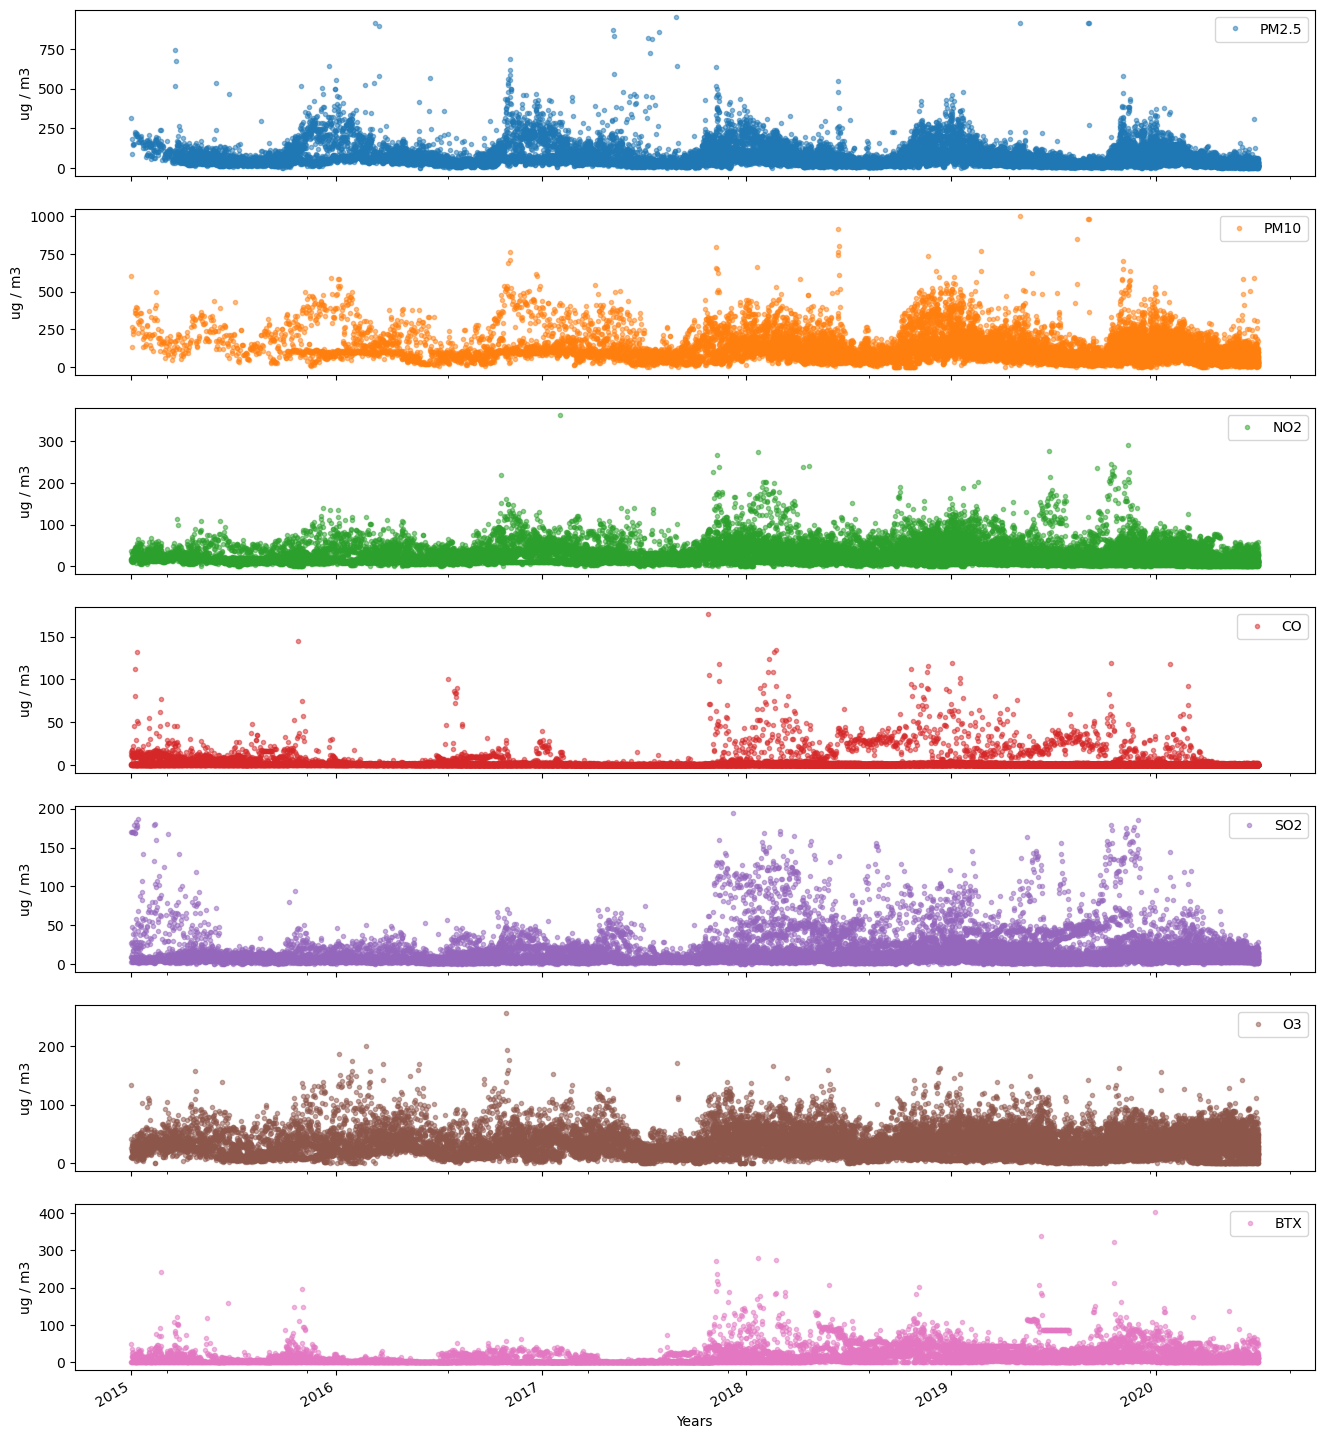

In [61]:
city_day.set_index('Date',inplace=True)
axes = city_day[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')


#### Now lets look at a few city wise pollution stats

In [62]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [63]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [64]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')


display_side_by_side(pm2_5,pm10,no2,so2,co,btx)

AttributeError: 'Styler' object has no attribute 'render'

In [44]:
df1 = df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')

In [112]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [111]:
df['City'].value_counts()

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64

In [47]:
    df1['Pollution content'] = df1['PM2.5']+df1['PM10']+df1['NO']+df1['NO2']+df1['NOx']+df1['NH3']+df1['CO']+df1['SO2']+df1['O3']+df1['Benzene']+df1['Toluene']+df1['Xylene']

In [48]:
def ploting(var):
    df1[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )
    plt.show()
ploting('Pollution content')

In [49]:
def max_bar_plot(var):
    x1 = df1[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p = max_bar_plot('Pollution content')

In [50]:
def min_bar_plot(var):
    x1 = df1[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', xTitle='Cities',yTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Pollution content')

### EDA using Pandas Profiling 

In [44]:
import pandas_profiling

In [4]:
data = pd.read_csv(r'C:\Users\Nimish Shukla\AQI India\aqi-india\city_day.csv')
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


### Prediction of AQI Bucket using PyCaret

In [52]:
from pycaret.classification import *

In [53]:
reg = setup(data = data, 
             target = 'AQI_Bucket',
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3456
1,Target Type,Multiclass
2,Label Encoded,"Good: 0, Moderate: 1, Poor: 2, Satisfactory: 3, Severe: 4, Very Poor: 5"
3,Original Data,"(29531, 16)"
4,Missing Values,True
5,Numeric Features,13
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [54]:
compare_models()   #compare all models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1,Ada Boost Classifier,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2,Gradient Boosting Classifier,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3,Extreme Gradient Boosting,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
4,Light Gradient Boosting Machine,0.998000,0.000000,0.996900,0.998100,0.998000,0.997300
5,Random Forest Classifier,0.997600,0.000000,0.995600,0.997700,0.997600,0.996800
6,CatBoost Classifier,0.996600,0.000000,0.994400,0.996600,0.996600,0.995300
7,K Neighbors Classifier,0.934200,0.000000,0.918800,0.934400,0.934100,0.910600
8,Extra Trees Classifier,0.882800,0.000000,0.835500,0.882600,0.881200,0.839600
9,Logistic Regression,0.742400,0.000000,0.610900,0.726300,0.713800,0.635700


In [56]:
dt_model = create_model('dt')   #Model creation

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0
5,1.0,0.0,1.0,1.0,1.0,1.0
6,1.0,0.0,1.0,1.0,1.0,1.0
7,1.0,0.0,1.0,1.0,1.0,1.0
8,1.0,0.0,1.0,1.0,1.0,1.0
9,1.0,0.0,1.0,1.0,1.0,1.0


In [60]:
# save the model
save_model(dt_model, 'decision_tree_model')

Transformation Pipeline and Model Succesfully Saved


export model

In [132]:
# Example for a scikit-learn model
import joblib
joblib.dump(model, 'dt.pkl')


NameError: name 'model' is not defined